This notebook opens JWST files and plots the images as a panel figure.


In [46]:
import matplotlib.pyplot as plt
from astropy.io import fits
import sys, os
# !{sys.executable} -m pip install aplpy
import numpy as np
import aplpy
from astropy.table import Table

In [47]:
# grab list of files

fileList = "/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/filelist.txt"
fileNames = np.genfromtxt(fileList, dtype=str, unpack=True, usecols=(0))
fileNames = ["/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/" + x for x in fileNames]
fileNames


['/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-o003_t003_miri_f770w_i2d.fits',
 '/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-o003_t003_miri_f1000w_i2d.fits',
 '/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-o003_t003_miri_f1130w_i2d.fits',
 '/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-o003_t003_miri_f2100w_i2d.fits',
 '/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-c1003_t003_nircam_clear-f200w_i2d.fits',
 '/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-c1003_t003_nircam_clear-f300m_i2d.fits',
 '/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-c1003_t003_nircam_clear-f335m_i2d.fits',
 '/Users/nessmayker/Desktop/JWSTLargeFiles/ngc1365_lvl3_from_mast/jw02107-c1003_t003_nircam_clear-f360m_i2d.fits']

In [48]:
# set up plots & wcs information.
import matplotlib.pyplot as plt
import astropy.io.fits as pyfits
from astropy.wcs import WCS
plots, wcss, hdus = [],[],[]

for i in range(len(fileNames)):
    if os.path.isfile(fileNames[i]):
        JWST_hdu = pyfits.open(fileNames[i])
        hdus.append(JWST_hdu)
        JWST_map = JWST_hdu[1].data
        plots.append(JWST_map)
        wcss.append(WCS(JWST_hdu[1].header, naxis=2))

current_cmap = plt.get_cmap("magma")
current_cmap.set_bad("black")



/Users/nessmayker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("magma"))
  app.launch_new_instance()


/Users/nessmayker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in log10
  del sys.path[0]
/Users/nessmayker/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in log10
  del sys.path[0]


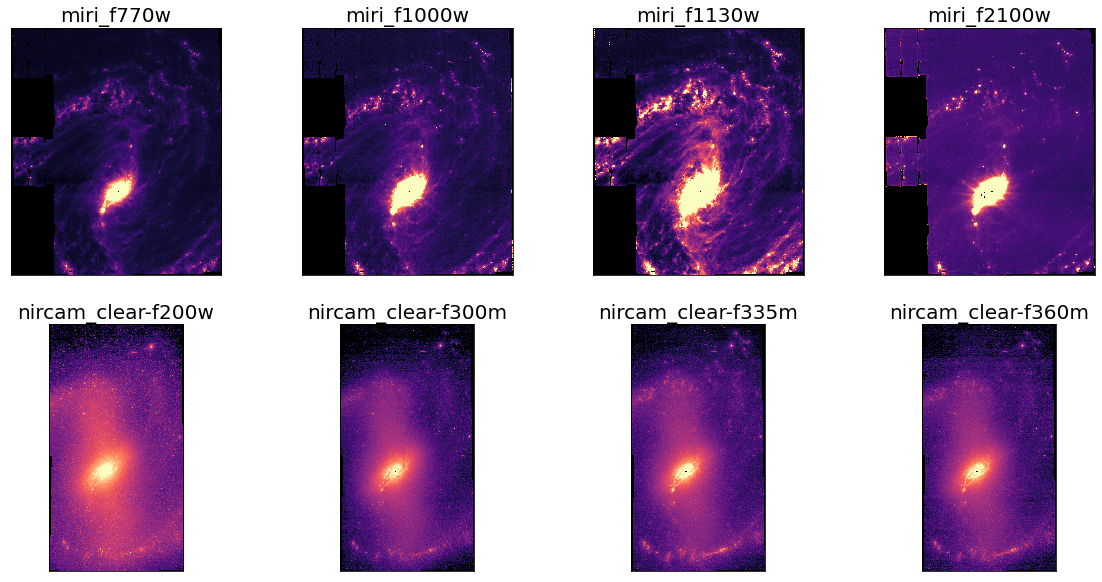

In [65]:
#        1,       2,      3,       4,        5,       6,       7,     8
vmm = [[5,125],[15,25],[22,35],[208,235],[0.1,40],[0.1,40],[0.1,40],[0.1,40]]
imgs = ["miri_f770w", "miri_f1000w", "miri_f1130w", "miri_f2100w",
        "nircam_clear-f200w", "nircam_clear-f300m", "nircam_clear-f335m",
        "nircam_clear-f360m"]

# make multipanel plot  
import math
i,j,m=0,0,0
PLOTS_PER_ROW = 4
fig, axs = plt.subplots(math.ceil(len(plots)/PLOTS_PER_ROW),PLOTS_PER_ROW, figsize=(20, 10))
for plot in plots:
    logplot = np.log10(plot)
    axs[i][j].imshow(logplot, cmap=current_cmap, aspect="equal", 
                     origin = "lower", interpolation = "nearest",
                    vmin=np.log10(vmm[m][0]), vmax=np.log10(vmm[m][1]))
    axs[i][j].set_title(imgs[m], fontsize=20)
    axs[i][j].set_xticks([])
    axs[i][j].set_yticks([])
    j+=1
    if j%PLOTS_PER_ROW==0:
        i+=1
        j=0
    m+=1
plt.show()
fig.savefig("../Figures/NGC1365allPanels.png", dpi=300)
plt.close()